In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
%%capture
import sys
sys.path.insert(0, '/home/raf_pc/Kemal/RiboSeqAnalysis')
from infrastructure.main import *

temp_repo_dir = "/home/raf_pc/Kemal/Temp/human"
data_repo_dir = "/home/raf_pc/Kemal/Data/sam_bukau"
script_path_infrastructure = "/home/raf_pc/Kemal/RiboSeqAnalysis/infrastructure/"

spt = [os.path.join(data_repo_dir, i) for i in ["Sixtymers_TT1.sam", "Sixtymers_TT2.sam"]]
sps = [os.path.join(data_repo_dir, i) for i in ["Sixtymers_Rep1.sam", "Sixtymers_Rep2.sam", "Sixtymers_NoPK.sam"]]

erb_serb = [f"/home/raf_pc/Kemal/Data/sam_bukau/SeRP/EBP1/Rep{i+1}/IP/IP{i+1}.sam" for i in range(2)]
erb_total = [f"/home/raf_pc/Kemal/Data/sam_bukau/SeRP/EBP1/Rep{i+1}/Total/Total{i+1}.sam" for i in range(2)]
nac_serb = [f"/home/raf_pc/Kemal/Data/sam_bukau/SeRP/NAC/Rep{i+1}/IP/IP{i+1}.sam" for i in range(2)]
nac_total = [f"/home/raf_pc/Kemal/Data/sam_bukau/SeRP/NAC/Rep{i+1}/Total/Total{i+1}.sam" for i in range(2)]

coco_d = [os.path.join(data_repo_dir, i) for i in ["Coco_Dis1.sam", "Coco_Dis2.sam"]]
coco_m = [os.path.join(data_repo_dir, i) for i in ["Coco_Mono1.sam", "Coco_Mono2.sam"]]

exclude_genes = ["ENSG00000160789"]

I = Infrastructre(temp_repo_dir,
                  exclude_genes=exclude_genes,
                  riboseq_assign_at=-15,
                  riboseq_assign_to="best_transcript",
                  ensembl_release=102,
                  organism="homo_sapiens",
                  verbose=True)

I.riboseq_sixtymers = RiboSeqSixtymers(I.temp_repo_dir, sps, spt, "sixtymers",
                                       I.riboseq_assign_at, I.riboseq_assign_to,
                                       I.protein_genome, I.gene_info,
                                       exclude_genes=I.exclude_genes, verbose=I.verbose)

In [3]:
#the_range = list(range(15,45))
#trieal = I.riboseq_coco.translatome.assign_for_defined_footprint_lengths(the_range, 32, I.protein_genome, I.gene_info)

In [4]:
#ls = list()
#for w in the_range:
#    counter = 0
#    for gene_id in trieal[30].keys():
#        counter += np.sum(trieal[w][gene_id])
#    ls.append(counter)

In [5]:
#plt.plot(the_range, ls); plt.show()
#ls.index(max(ls)) + min(the_range)

In [6]:
window_len=180
the_sum = [0] * window_len
the_counts = [0] * window_len
the_sum_tr = [0] * window_len
the_counts_t = [0] * window_len
for gene_id in I.gene_list:
    if I.riboseq_sixtymers.experiment.calculate_rpkm_genes(gene_id) > 1:
        f120 = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)
        f120 = (f120 / np.sum(f120))[:window_len]
        the_sum = [f120[i] + the_sum[i] if i<len(f120) else the_sum[i] for i in range(window_len)] 
        the_counts = [1 + the_counts[i] if i<len(f120) else the_counts[i] for i in range(window_len)]
    if I.riboseq_sixtymers.translatome.calculate_rpkm_genes(gene_id) > 1:
        f120_t = I.riboseq_sixtymers.translatome.calculate_rpm_positions(gene_id)
        f120_t = (f120_t / np.sum(f120_t))[:window_len]
        the_sum_tr = [f120_t[i] + the_sum_tr[i] if i<len(f120_t) else the_sum_tr[i] for i in range(window_len)]
        the_counts_t = [1 + the_counts_t[i] if i<len(f120_t) else the_counts_t[i] for i in range(window_len)]
the_sum = [the_sum[i]/the_counts[i] * 1000 for i in range(window_len)] 
the_sum_tr = [the_sum_tr[i]/the_counts_t[i] * 1000 for i in range(window_len)] 

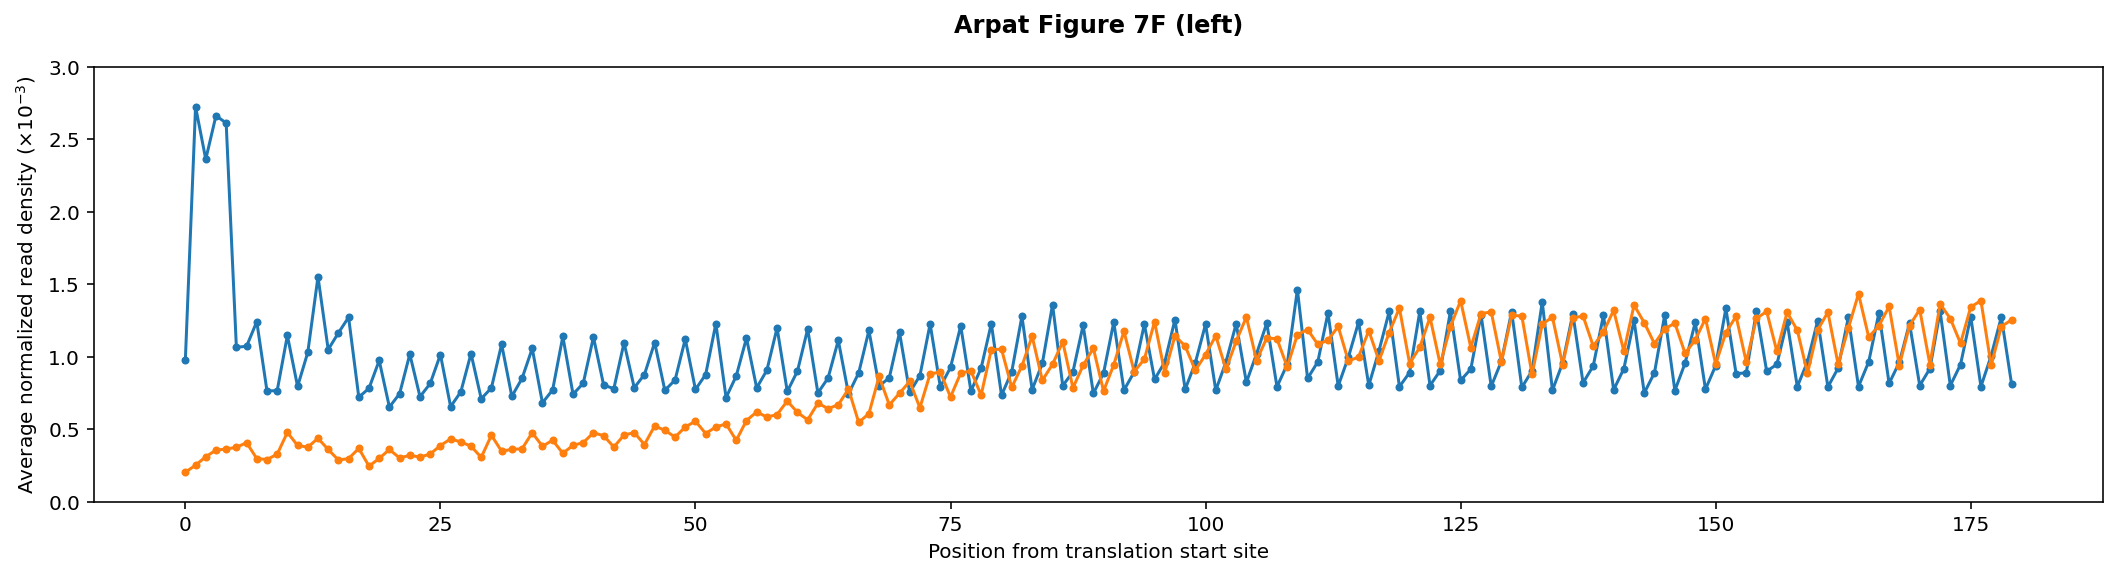

In [7]:
fig = plt.figure(figsize=(18, 4)) 
plt.plot(the_sum, marker=".")
plt.plot(the_sum_tr, marker=".")
plt.title("Arpat Figure 7F (left)", fontweight="bold", y=1.05)
plt.ylabel(r"Average normalized read density ($\times10^{-3}$)")
plt.xlabel("Position from translation start site")
plt.ylim(0,3)
plt.show()

In [8]:
window_len=180
the_sum = [0] * window_len
the_counts = [0] * window_len
the_sum_tr = [0] * window_len
the_counts_t = [0] * window_len
for gene_id in I.gene_list:
    if I.riboseq_sixtymers.experiment.calculate_rpkm_genes(gene_id) > 1:
        f120 = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)
        f120 = (f120 / np.sum(f120))[-window_len:]
        the_sum = [f120[i] + the_sum[i] if i<len(f120) else the_sum[i] for i in range(window_len)] 
        the_counts = [1 + the_counts[i] if i<len(f120) else the_counts[i] for i in range(window_len)]
    if I.riboseq_sixtymers.translatome.calculate_rpkm_genes(gene_id) > 1:
        f120_t = I.riboseq_sixtymers.translatome.calculate_rpm_positions(gene_id)
        f120_t = (f120_t / np.sum(f120_t))[-window_len:]
        the_sum_tr = [f120_t[i] + the_sum_tr[i] if i<len(f120_t) else the_sum_tr[i] for i in range(window_len)]
        the_counts_t = [1 + the_counts_t[i] if i<len(f120_t) else the_counts_t[i] for i in range(window_len)]
the_sum = [the_sum[i]/the_counts[i] * 1000 for i in range(window_len)] 
the_sum_tr = [the_sum_tr[i]/the_counts_t[i] * 1000 for i in range(window_len)] 

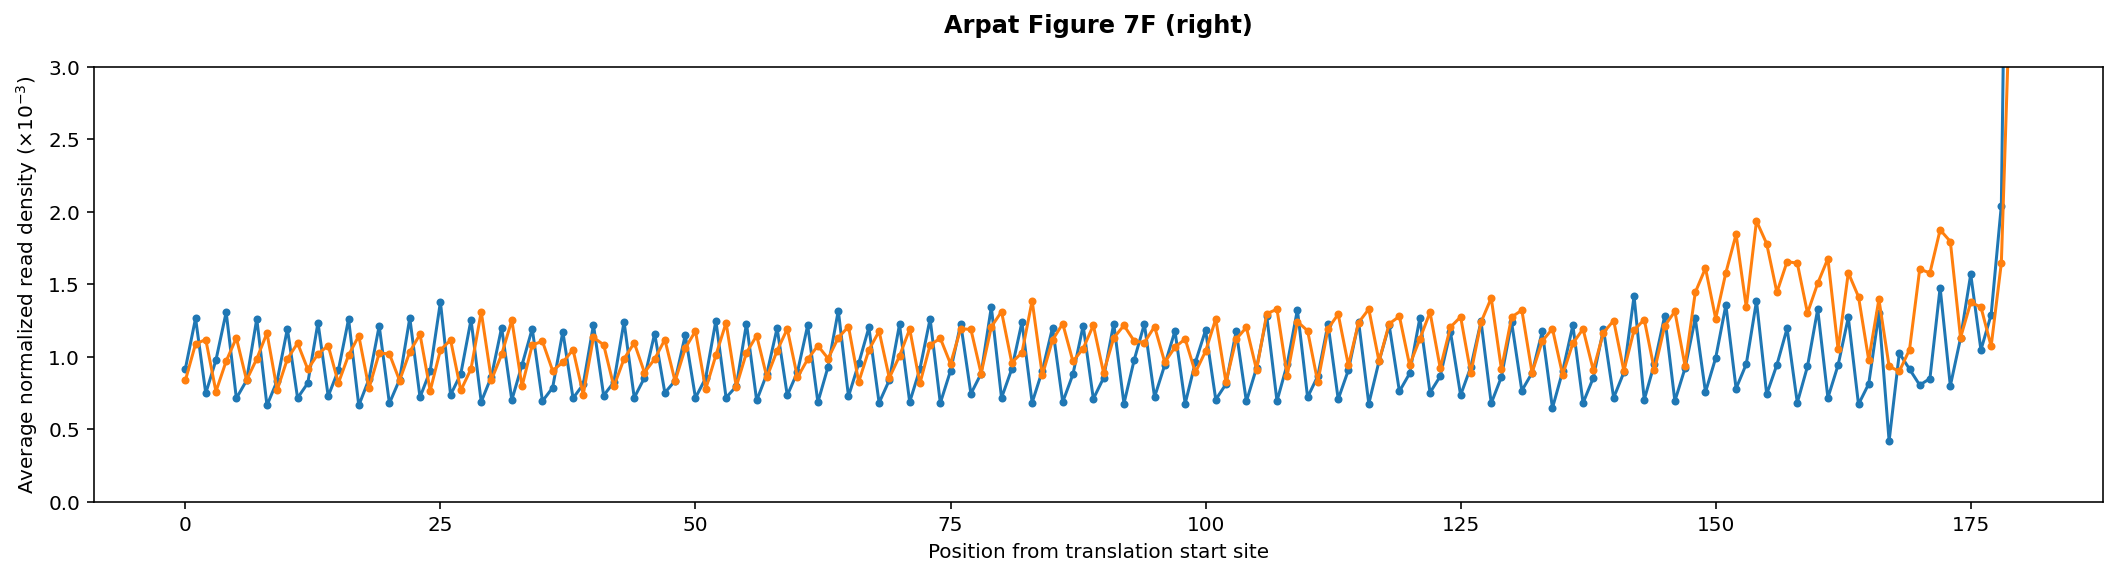

In [9]:
fig = plt.figure(figsize=(18, 4)) 
plt.plot(the_sum, marker=".")
plt.plot(the_sum_tr, marker=".")
plt.title("Arpat Figure 7F (right)", fontweight="bold", y=1.05)
plt.ylabel(r"Average normalized read density ($\times10^{-3}$)")
plt.xlabel("Position from translation start site")
plt.ylim(0,3)
plt.show()